# Pixel level classification using Naive-Bayes Classifier

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sb
import cv2

%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.figsize'] = [18, 16]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 80
plt.rcParams['font.size'] = 14

### Data preprocessing

In [2]:
# Separate data channel and make channels as features 
cws_path = 'dataset/'
img = cv2.imread(cws_path+'frame170.jpg')
img_GT = cv2.imread(cws_path+'frame170.png')
# img.shape
# Seprate channels of original image, flatten then stack together
img_B, img_G, img_R = img[:,:,0], img[:,:,1], img[:,:,2]
X = np.vstack((img_B.flatten(), img_G.flatten(), img_R.flatten())).T

# Convert GT to grayscale
#print(img_GT.shape)
img_GT = cv2.cvtColor(img_GT, cv2.COLOR_BGR2GRAY)
#print(img_GT.shape)

y = img_GT.flatten()

# Random shuffle the whole dataset 
dataset = np.hstack((X, y.reshape(len(y), 1)))
np.random.shuffle(dataset)

# Split X and y 
X = dataset[:,:-1]
y = dataset[:,-1]

# Convert label to sequence of categorical value 
#label = 0
#for v in np.unique(y):
#    y[y == v] = label
#    label += 1

# Scale X 
#scaler = preprocessing.StandardScaler()
#X = scaler.fit_transform(X)

# Apply PCA 

## 

In [3]:
# Split Training and Testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [4]:
#model = svm.SVC()
#model.fit(X_train, y_train)
#accuracy = model.score(X_test, y_test)
#print(accuracy)


In [5]:
model = GaussianNB()
model.fit(X_train, np.ravel(y_train))

# data prediction 
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)

#print('PRIOR PROBABILITY : {}'.format(model.class_prior_))
print('TESTING ACCURACY : {:05.4f} %'.format(accuracy*100))

TESTING ACCURACY : 93.0876 %


VALIDATION ACCURACY : 92.3979 %


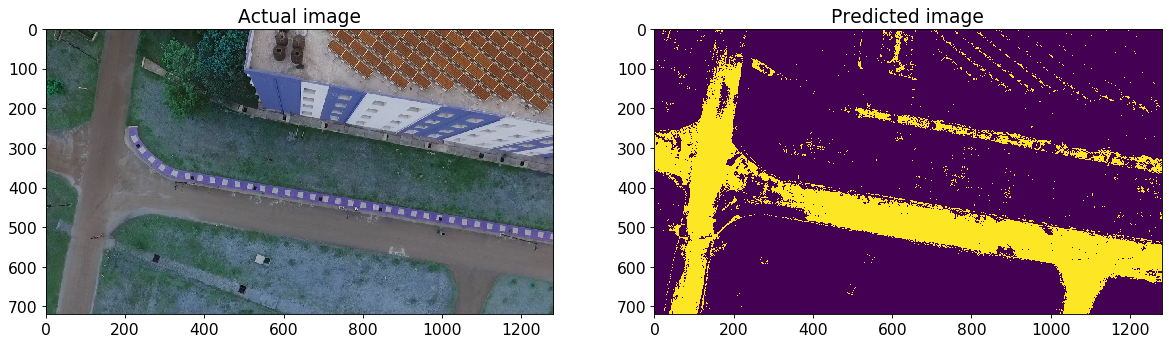

In [11]:
# Validation 
img_valid = cv2.imread(cws_path+'frame120.jpg')
img_valid_GT = cv2.imread(cws_path+'frame120.png')

# Seprate channels of original image, flatten then stack together
img_valid_B, img_valid_G, img_valid_R = img_valid[:,:,0], img_valid[:,:,1], img_valid[:,:,2]
X_valid = np.vstack((img_valid_B.flatten(), img_valid_G.flatten(), img_valid_R.flatten())).T

# Convert GT to grayscale
img_valid_GT = cv2.cvtColor(img_valid_GT, cv2.COLOR_BGR2GRAY)
y_valid = img_valid_GT.flatten()

y_predict = model.predict(X_valid)

accuracy_val = accuracy_score(y_valid, y_predict)
print('VALIDATION ACCURACY : {:05.4f} %'.format(accuracy_val*100))

# Plotting 
# Get the Goung_truth and the Predict images
ground_truth_image = img_valid_GT
predicted_image = np.reshape(y_predict, (img_valid_GT.shape[0],img_valid_GT.shape[1]))
# Ploting the the Actual Image and the Predicted Image 
fig = plt.figure()
actual_fig = fig.add_subplot(1,2,1)
actual_fig.set_title('Actual image')
plt.imshow(img_valid)
predict_fig = fig.add_subplot(1,2,2)
predict_fig.set_title('Predicted image')
plt.imshow(predicted_image)
plt.show()

###